In [34]:
#imports
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

In [35]:
#Machine Learning imports 
from sklearn.ensemble import RandomForestClassifier

In [36]:
#Load Test & Training Data Sets
train_DF = pd.read_csv("/Users/sominwadhwa/Desktop/Kaggle/Titanic/train.csv", dtype = {"Age": np.float64}, )
test_DF = pd.read_csv("/Users/sominwadhwa/Desktop/Kaggle/Titanic/test.csv", dtype = {"Age": np.float64}, )

In [37]:
#Visualizing Data (First n-rows)
train_DF.head(n = 4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [38]:
print("------Training Data Information-------\n")
train_DF.info()
print("\n\n------Test Data Information-------\n")
test_DF.info()

------Training Data Information-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


------Test Data Information-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-n

In [39]:
#Dropping data irrelevant to analysis
train_DF = train_DF.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = False)
test_DF = test_DF.drop(['Name','Ticket'], axis = 1, inplace = False)

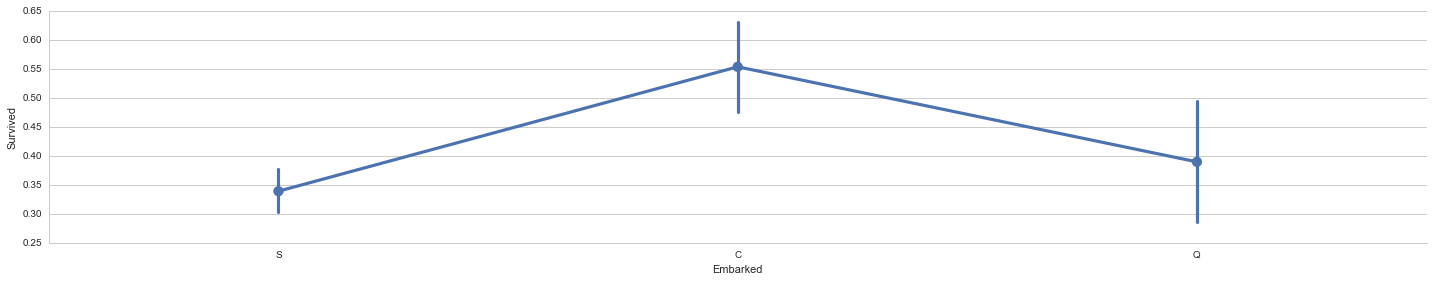

In [49]:
#Creating Dummy Plots based on 'Embarked'
train_DF['Embarked'] = train_DF['Embarked'].fillna('S')
sns.factorplot(x = 'Embarked', y = 'Survived', data=train_DF, size = 4, aspect = 5)

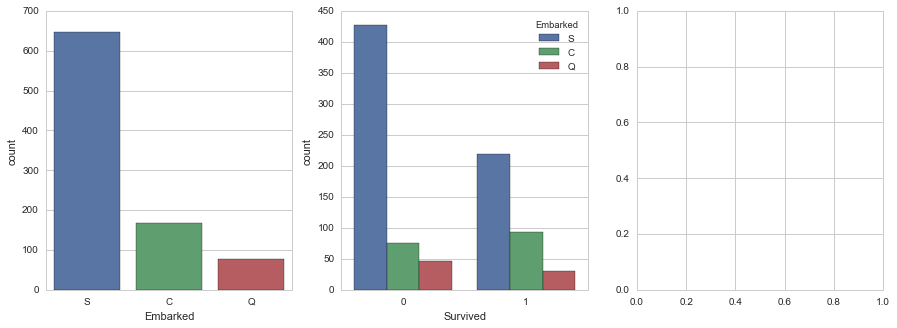

In [53]:
figure, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'Embarked', data = train_DF, ax = axis1)
sns.countplot(x = 'Survived', hue = 'Embarked', data = train_DF, ax = axis2)